# <font color=#227C9D>Sommaire</font>
* [Configuration](#Configuration)
* [Chargement](#Chargement)
* [Valeurs manquantes](#Valeurs-manquantes)
* [Valeurs uniques](#Valeurs-uniques)
* [Distributions](#Distributions)
* [Boites à moustache](#Boites-a-moustache)
* [Correlations](#Correlations)
* [ACP](#ACP)

## Configuration

In [1]:
import matplotlib as mplt
import pandas as pd
import seaborn as sns
sns.set(font='Franklin Gothic Book',rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

# use the .set_context() method to fine-tune font size settings.
#sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14})
colors = ['#ef476f', '#ffd166', '#0E1428', '#06d6a0', '#118ab2','#073b4c']
sns.set_palette(sns.color_palette(colors))

mplt.font_manager._rebuild()

pd.set_option('display.min_rows', 30)

In [2]:
import time
start=time.time()

## Chargement

In [3]:
import pandas as pd

df=pd.read_csv("flights_cleaned_2000.csv",sep=",")

In [4]:
%run /Users/hui-guan/Documents/Developpement/Jupyter/Lib/outilsEDA.py

In [5]:
df.sample(50)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_SEQ_ID,...,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,SHORT_FLIGHT,MEDIUM_FLIGHT,LONG_FLIGHT
212885,1,18,1,2016-01-18,DL,19790.0,DL,N674DL,1180.0,1486903.0,...,-8.0,0.0,0.0,250.0,244.0,224.0,1931.0,0,1,0
607536,2,21,7,2016-02-21,EV,20366.0,EV,N132EV,5483.0,1143302.0,...,-1.0,0.0,0.0,219.0,221.0,191.0,1214.0,0,1,0
1014873,3,30,3,2016-03-30,AA,19805.0,AA,N032AA,1635.0,1039705.0,...,-10.0,0.0,0.0,148.0,143.0,120.0,731.0,0,1,0
663268,2,17,3,2016-02-17,WN,19393.0,WN,N953WN,398.0,1039705.0,...,-27.0,0.0,0.0,160.0,138.0,124.0,874.0,0,1,0
688694,2,24,3,2016-02-24,WN,19393.0,WN,N8631A,1673.0,1323202.0,...,NaN,1.0,0.0,165.0,NaN,NaN,937.0,0,1,0
19062,1,19,2,2016-01-19,AA,19805.0,AA,N3MRAA,1300.0,1129804.0,...,-17.0,0.0,0.0,84.0,73.0,59.0,447.0,0,1,0
671350,2,19,5,2016-02-19,WN,19393.0,WN,N560WN,942.0,1069302.0,...,-3.0,0.0,0.0,260.0,259.0,235.0,1587.0,0,1,0
290605,1,10,7,2016-01-10,WN,19393.0,WN,N396SW,729.0,1233904.0,...,NaN,0.0,0.0,150.0,184.0,144.0,945.0,0,1,0
730467,3,13,7,2016-03-13,DL,19790.0,DL,N723TW,2262.0,1289203.0,...,26.0,0.0,0.0,333.0,325.0,303.0,2475.0,0,1,0
365914,2,22,1,2016-02-22,F9,20436.0,F9,N908FR,1092.0,1463502.0,...,-13.0,0.0,0.0,180.0,175.0,147.0,1084.0,0,1,0


In [6]:
dfProfil=profil(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097760 entries, 0 to 1097759
Data columns (total 35 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   MONTH                  1097760 non-null  int64  
 1   DAY_OF_MONTH           1097760 non-null  int64  
 2   DAY_OF_WEEK            1097760 non-null  int64  
 3   FL_DATE                1097760 non-null  object 
 4   UNIQUE_CARRIER         1097760 non-null  object 
 5   AIRLINE_ID             1097760 non-null  float64
 6   CARRIER                1097760 non-null  object 
 7   TAIL_NUM               1091828 non-null  object 
 8   FL_NUM                 1097760 non-null  float64
 9   ORIGIN_AIRPORT_SEQ_ID  1097760 non-null  float64
 10  ORIGIN_CITY_NAME       1097760 non-null  object 
 11  ORIGIN_WAC             1097760 non-null  float64
 12  DEST_AIRPORT_SEQ_ID    1097760 non-null  float64
 13  DEST_CITY_NAME         1097760 non-null  object 
 14  DEST_WAC          

## Valeurs manquantes

Text(0, 0.5, 'Variable')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


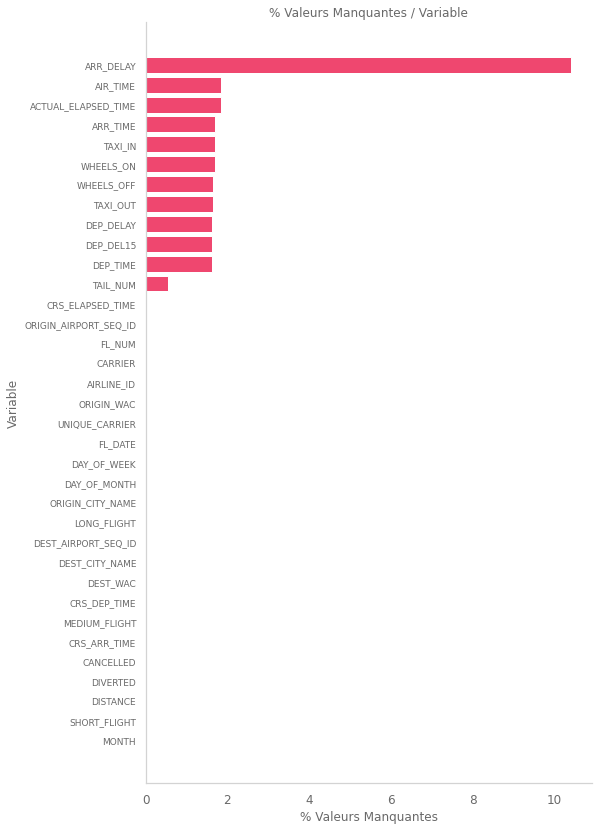

In [8]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,14)
plt.rcParams["ytick.labelsize"]=9
plt.rcParams["xtick.labelsize"]=12

profilTrie=dfProfil.sort_values("%_missing_values",ascending=True) #Tri

plt.barh(profilTrie.index,profilTrie["%_missing_values"])

# Titre et libelles
plt.title('% Valeurs Manquantes / Variable')
plt.xlabel('% Valeurs Manquantes')
plt.ylabel('Variable')

Les variables présentent, dans l'ensemble moins de 2% de valeurs manquantes, et moins de 10% pour la variable cible. Les données sont relativement complètes sur cet aspect.

## Valeurs uniques

Text(0, 0.5, '% Valeurs Uniques')

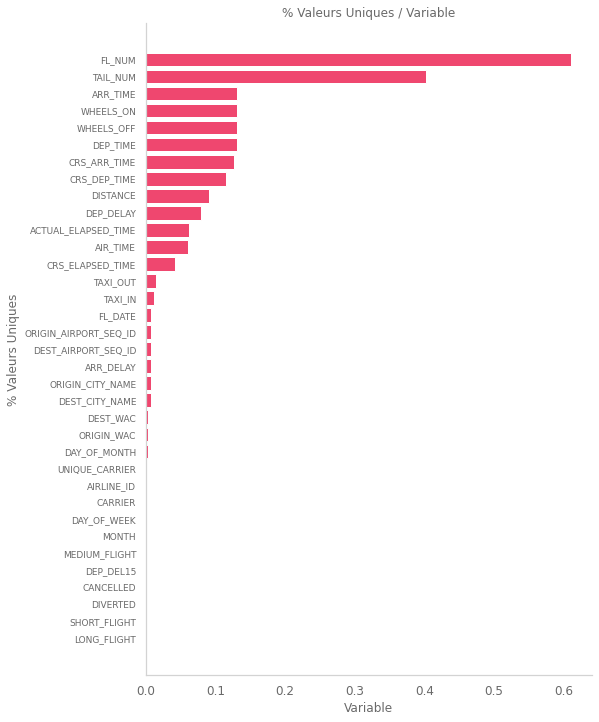

In [9]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,12)
plt.rcParams["ytick.labelsize"]=9
plt.rcParams["xtick.labelsize"]=12

profilTrie=dfProfil.sort_values("%_unique_values",ascending=True) #Tri
plt.barh(profilTrie.index,profilTrie["%_unique_values"])

# Titre et libelles
plt.title('% Valeurs Uniques / Variable')
plt.xlabel('Variable')
plt.ylabel('% Valeurs Uniques')

## Distributions

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


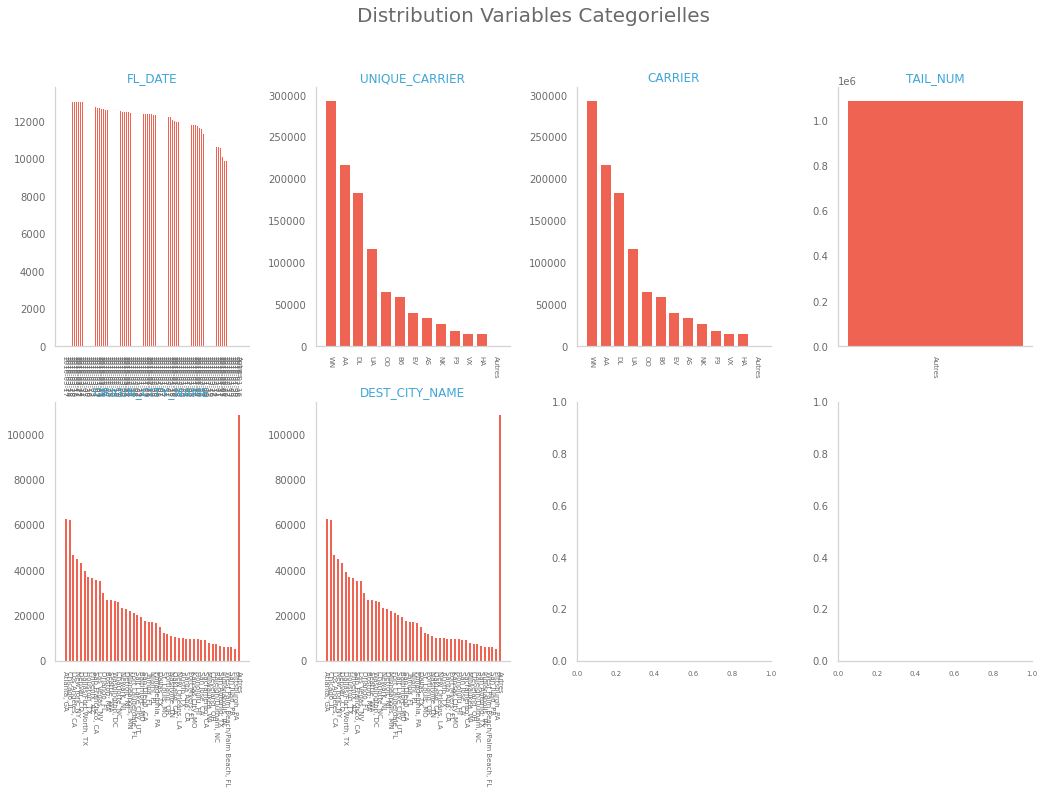

In [10]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (100,20)
plt.rcParams["xtick.labelsize"]=7
plt.rcParams["ytick.labelsize"]=10

plotCategoricalDistributions(plt,df,2,4,15,10)

plt.show()

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


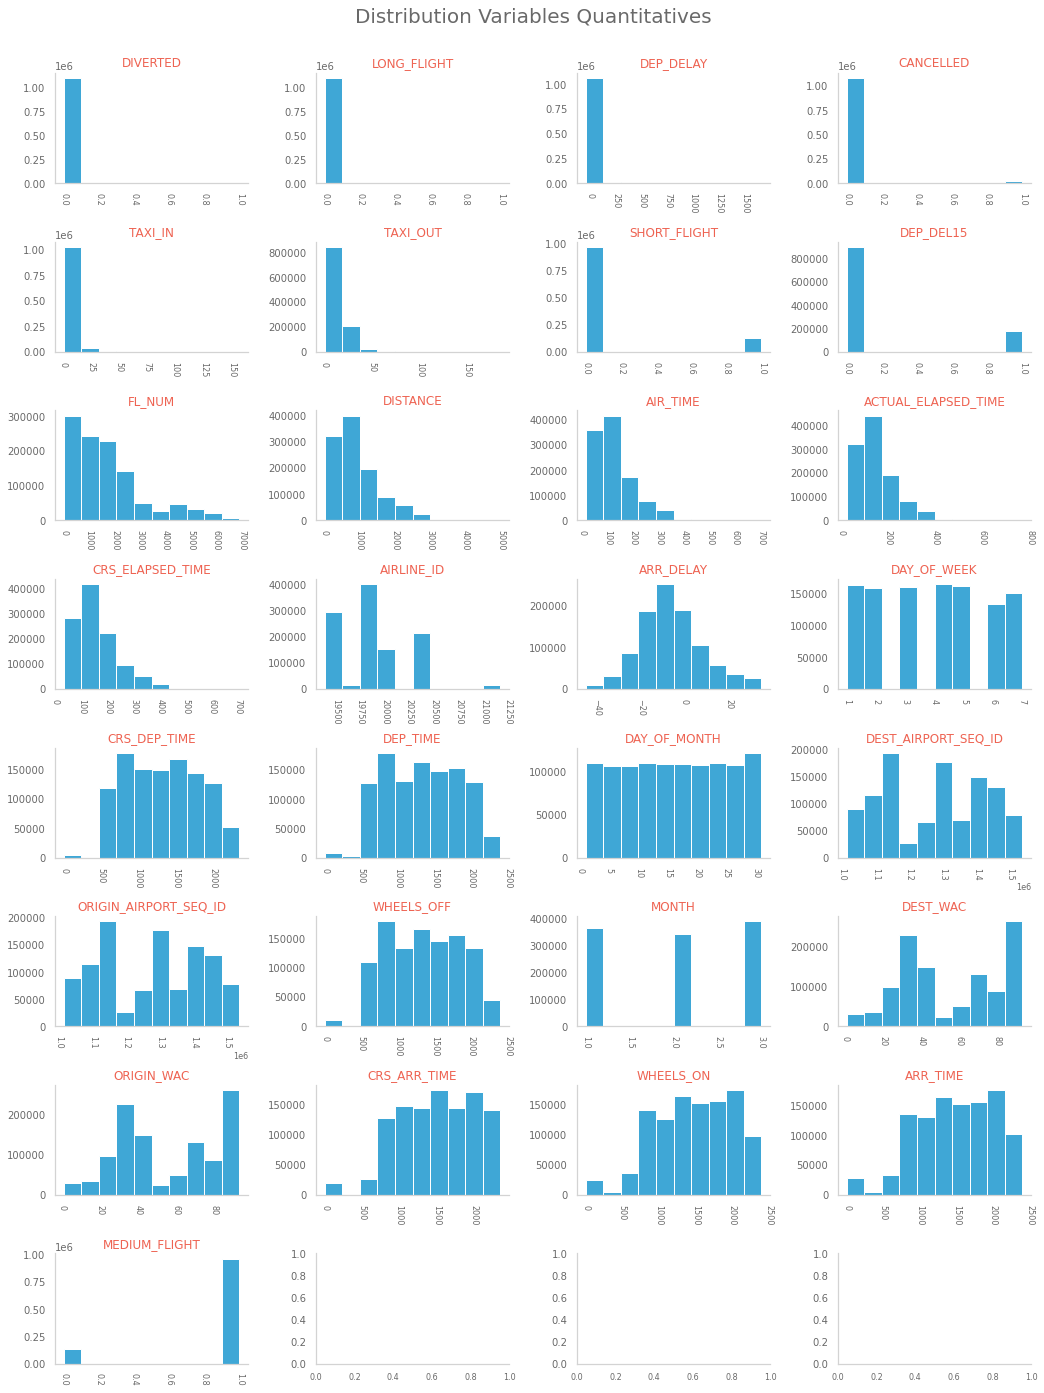

In [11]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (200,20)
plt.rcParams["xtick.labelsize"]=8
plt.rcParams["ytick.labelsize"]=10

plotQuantitativeDistributions(plt,df,8,4,15,20)

plt.show()

Text(0, 0.5, 'retard (mins)')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


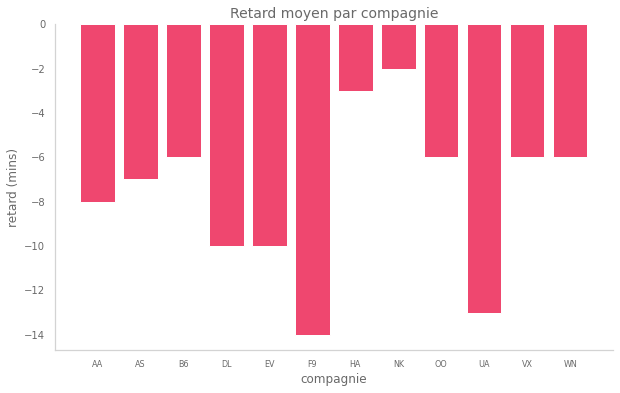

In [12]:
import matplotlib.pyplot as plt
delayByCarrier=df.groupby('CARRIER')['ARR_DELAY'].median()
fig = plt.figure(figsize=(10,6))

plt.bar(delayByCarrier.index,delayByCarrier)
plt.title('Retard moyen par compagnie',fontsize=14)
plt.xlabel('compagnie')
plt.ylabel('retard (mins)')

Les compagnies ne sont pas égales face la ponctualité.
En excluant les compagnies ayant moins de 2000 vols, la moyenne des retards devient négative (les vols sont plutot en avance).

Text(0, 0.5, 'retard (mins)')

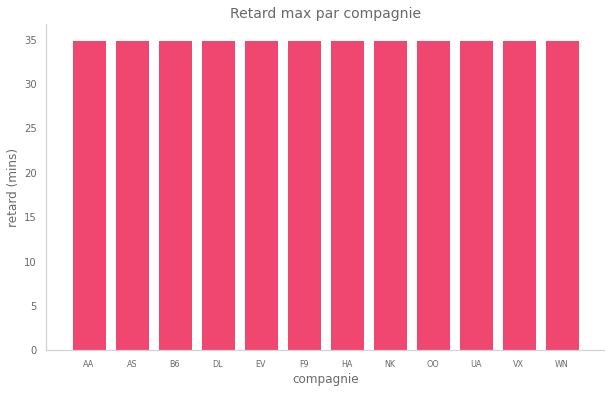

In [13]:
import matplotlib.pyplot as plt
delayByCarrier=df.groupby('CARRIER')['ARR_DELAY'].max()
fig = plt.figure(figsize=(10,6))

plt.bar(delayByCarrier.index,delayByCarrier)
plt.title('Retard max par compagnie',fontsize=14)
plt.xlabel('compagnie')
plt.ylabel('retard (mins)')

On constate que certaines compagnies ont en moyenne plus de retards que d'autres (B6, NK, VX)

Text(0, 0.5, 'retard (mins)')

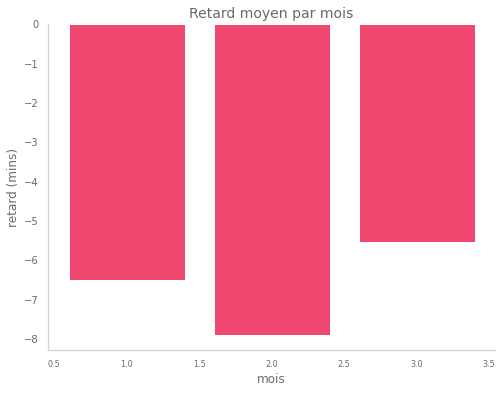

In [14]:
import matplotlib.pyplot as plt
delayByCarrier=df.groupby('MONTH')['ARR_DELAY'].mean()
fig = plt.figure(figsize=(8,6))

plt.bar(delayByCarrier.index,delayByCarrier)
plt.title('Retard moyen par mois',fontsize=14)
plt.xlabel('mois')
plt.ylabel('retard (mins)')

Text(0, 0.5, 'retard (mins)')

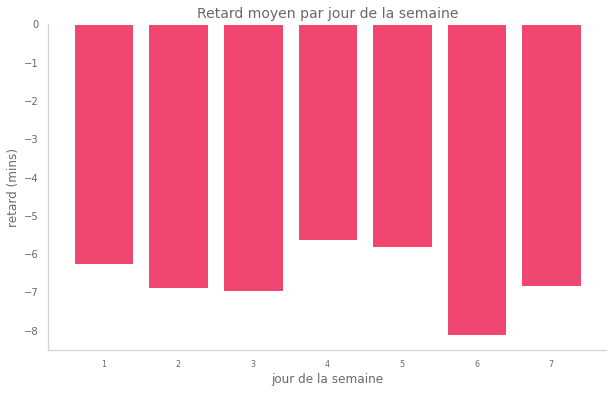

In [15]:
import matplotlib.pyplot as plt
delayByCarrier=df.groupby('DAY_OF_WEEK')['ARR_DELAY'].mean()
fig = plt.figure(figsize=(10,6))

plt.bar(delayByCarrier.index,delayByCarrier)
plt.title('Retard moyen par jour de la semaine',fontsize=14)
plt.xlabel('jour de la semaine')
plt.ylabel('retard (mins)')

Les retads (ou avance) moyens par jour de la semaine sont environ de 6 minutes d'avance dans l'ensemble (à 2 minutes près).

Text(0, 0.5, 'retard (mins)')

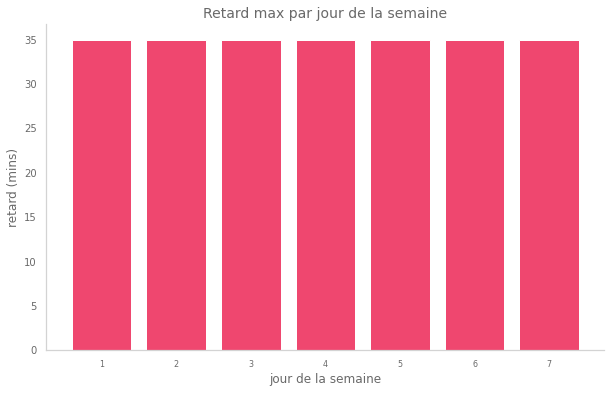

In [16]:
import matplotlib.pyplot as plt
delayByCarrier=df.groupby('DAY_OF_WEEK')['ARR_DELAY'].max()
fig = plt.figure(figsize=(10,6))

plt.bar(delayByCarrier.index,delayByCarrier)
plt.title('Retard max par jour de la semaine',fontsize=14)
plt.xlabel('jour de la semaine')
plt.ylabel('retard (mins)')

Text(0, 0.5, 'retard (mins)')

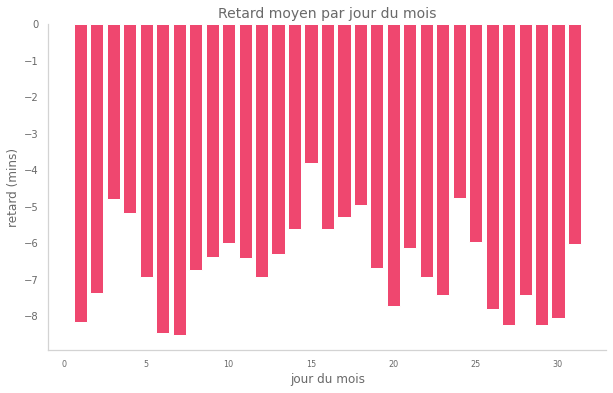

In [17]:
import matplotlib.pyplot as plt
delayByCarrier=df.groupby('DAY_OF_MONTH')['ARR_DELAY'].mean()
fig = plt.figure(figsize=(10,6))

plt.bar(delayByCarrier.index,delayByCarrier)
plt.title('Retard moyen par jour du mois',fontsize=14)
plt.xlabel('jour du mois')
plt.ylabel('retard (mins)')

On observe plus d'avance en début et fin de mois.

Text(0, 0.5, 'retard (mins)')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


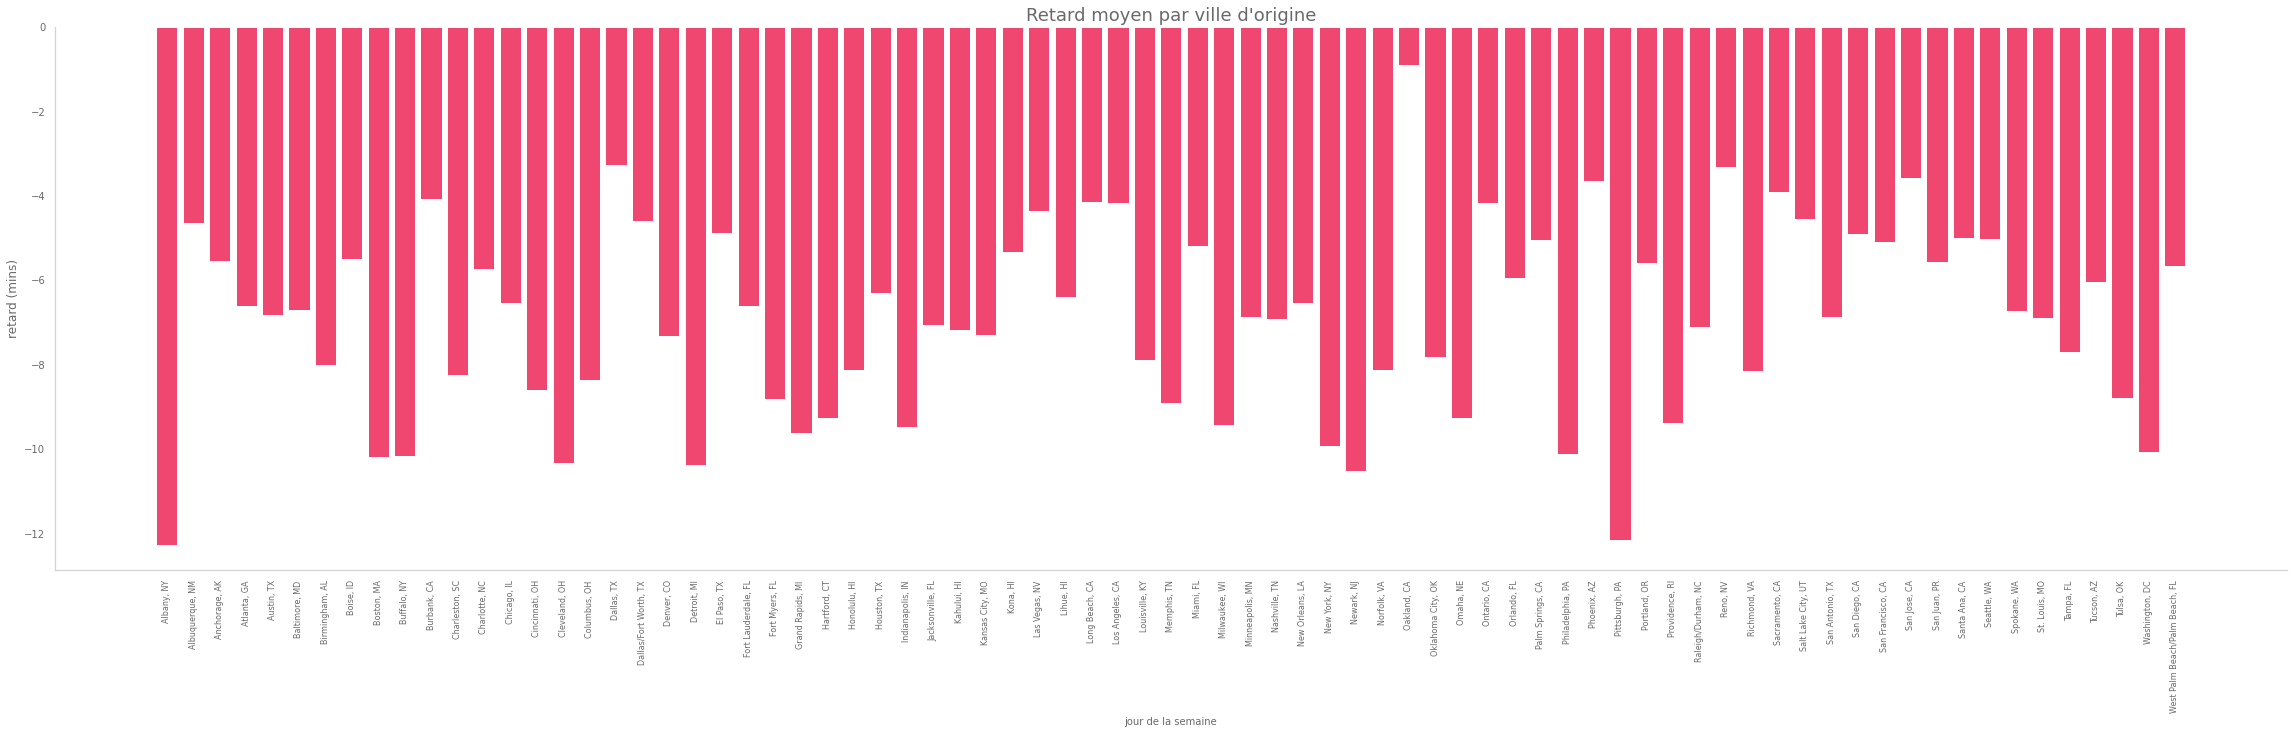

In [18]:
import matplotlib.pyplot as plt
delayByOrigin=df.groupby('ORIGIN_CITY_NAME')['ARR_DELAY'].mean()
fig = plt.figure(figsize=(40,10))

plt.bar(delayByOrigin.index,delayByOrigin)
plt.title('Retard moyen par ville d\'origine',fontsize=18)
plt.xlabel('jour de la semaine',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('retard (mins)')

Text(0, 0.5, 'retard (mins)')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


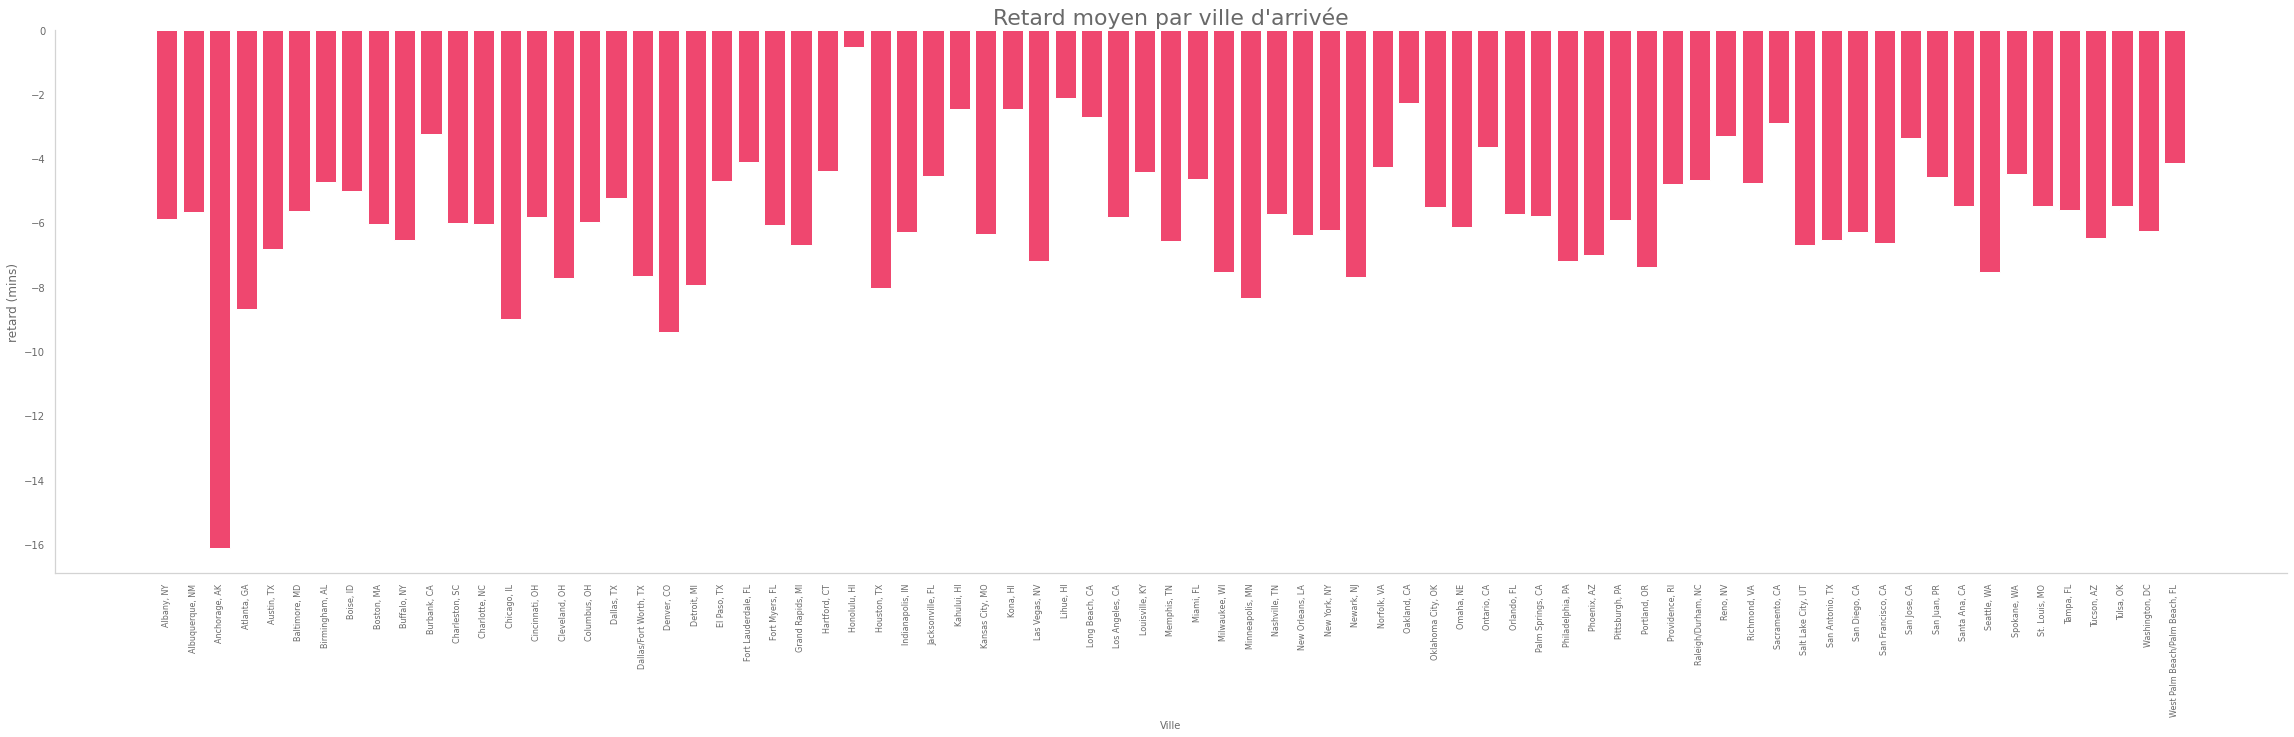

In [19]:
import matplotlib.pyplot as plt
delayByOrigin=df.groupby('DEST_CITY_NAME')['ARR_DELAY'].mean()
fig = plt.figure(figsize=(40,10))

plt.bar(delayByOrigin.index,delayByOrigin)
plt.title('Retard moyen par ville d\'arrivée',fontsize=22)
plt.xlabel('Ville',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('retard (mins)')

Les retards/avances moyens peuvent être très variables suivant les villes d'origine ou de destination.

In [20]:
#creation de la variable date a partir du jour du mois et du mois
df["DATE"]=df["MONTH"].map(str)+"-"+df["DAY_OF_MONTH"].map(str)

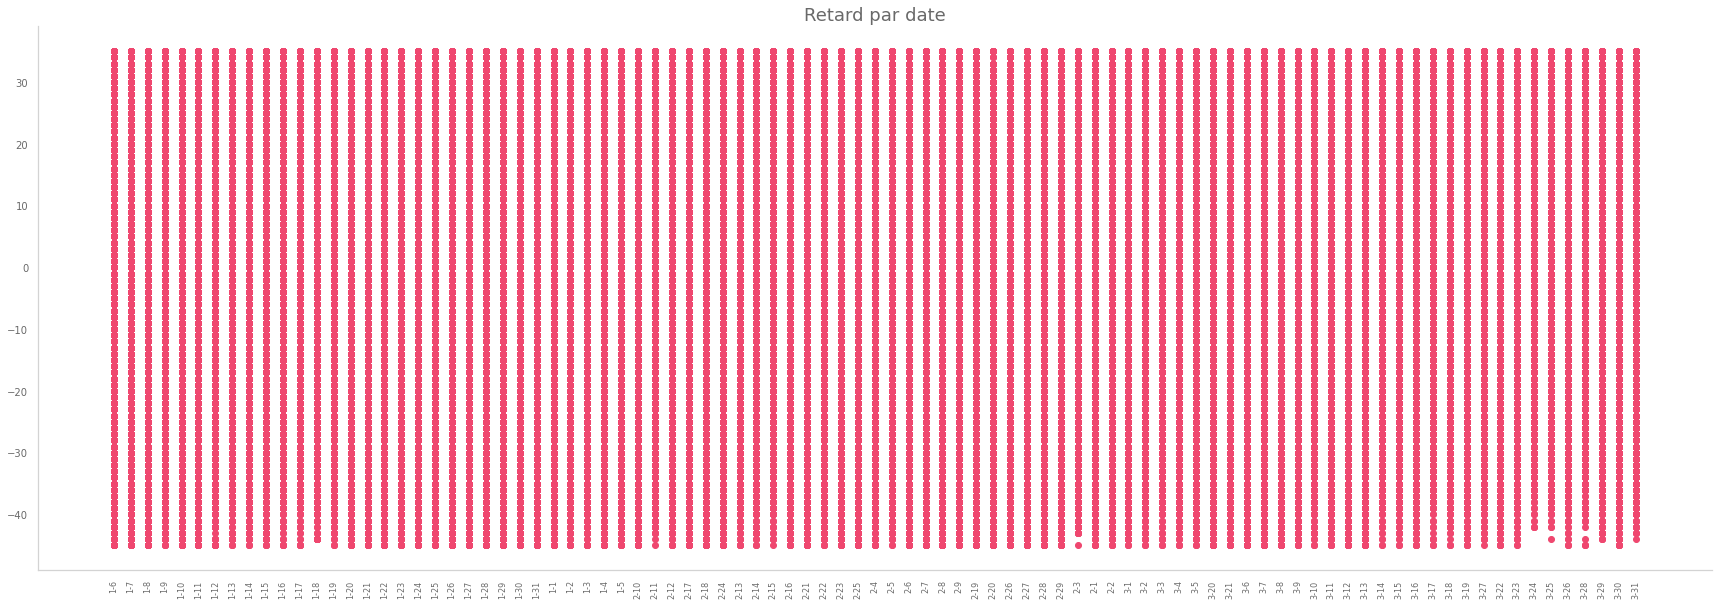

In [21]:
plt.figure(figsize=(30,10))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df["DATE"],df["ARR_DELAY"],'o');
plt.title('Retard par date',fontsize=18)
plt.xticks(rotation=90);

L'amplitude des retards est homogene sur l'ensemble.

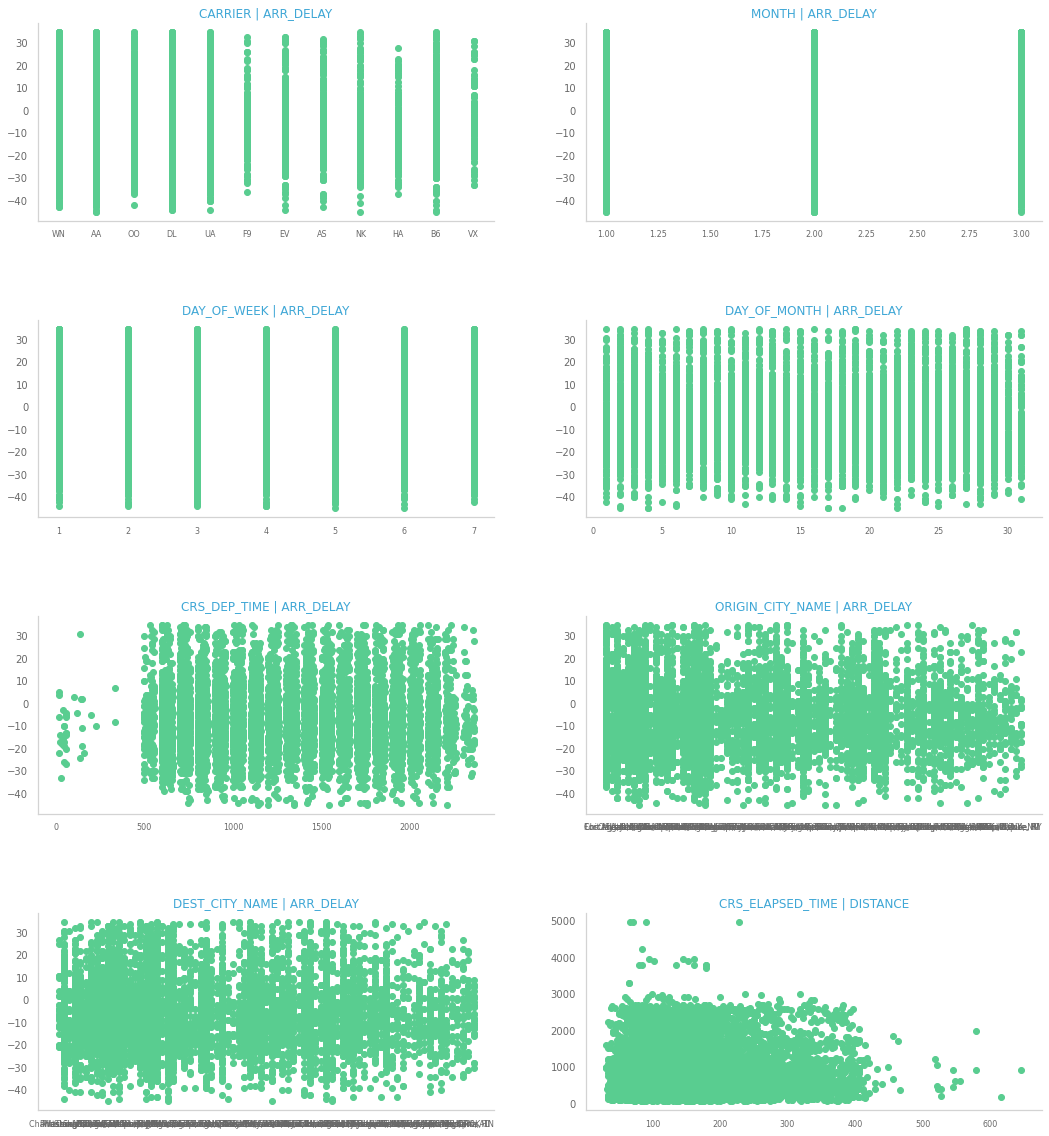

In [22]:
pairs=[['CARRIER','ARR_DELAY'],
       ['MONTH','ARR_DELAY'],
       ['DAY_OF_WEEK','ARR_DELAY'],
       ['DAY_OF_MONTH','ARR_DELAY'],
       ['CRS_DEP_TIME','ARR_DELAY'],
       ['ORIGIN_CITY_NAME','ARR_DELAY'],
       ['DEST_CITY_NAME','ARR_DELAY'],
      ['CRS_ELAPSED_TIME','DISTANCE']]
      
plotPairs(plt,df,pairs,4,2)

On n'observe pas de relation linéaire évidente entre les estimateurs et la variable cible.

## Boites a moustache

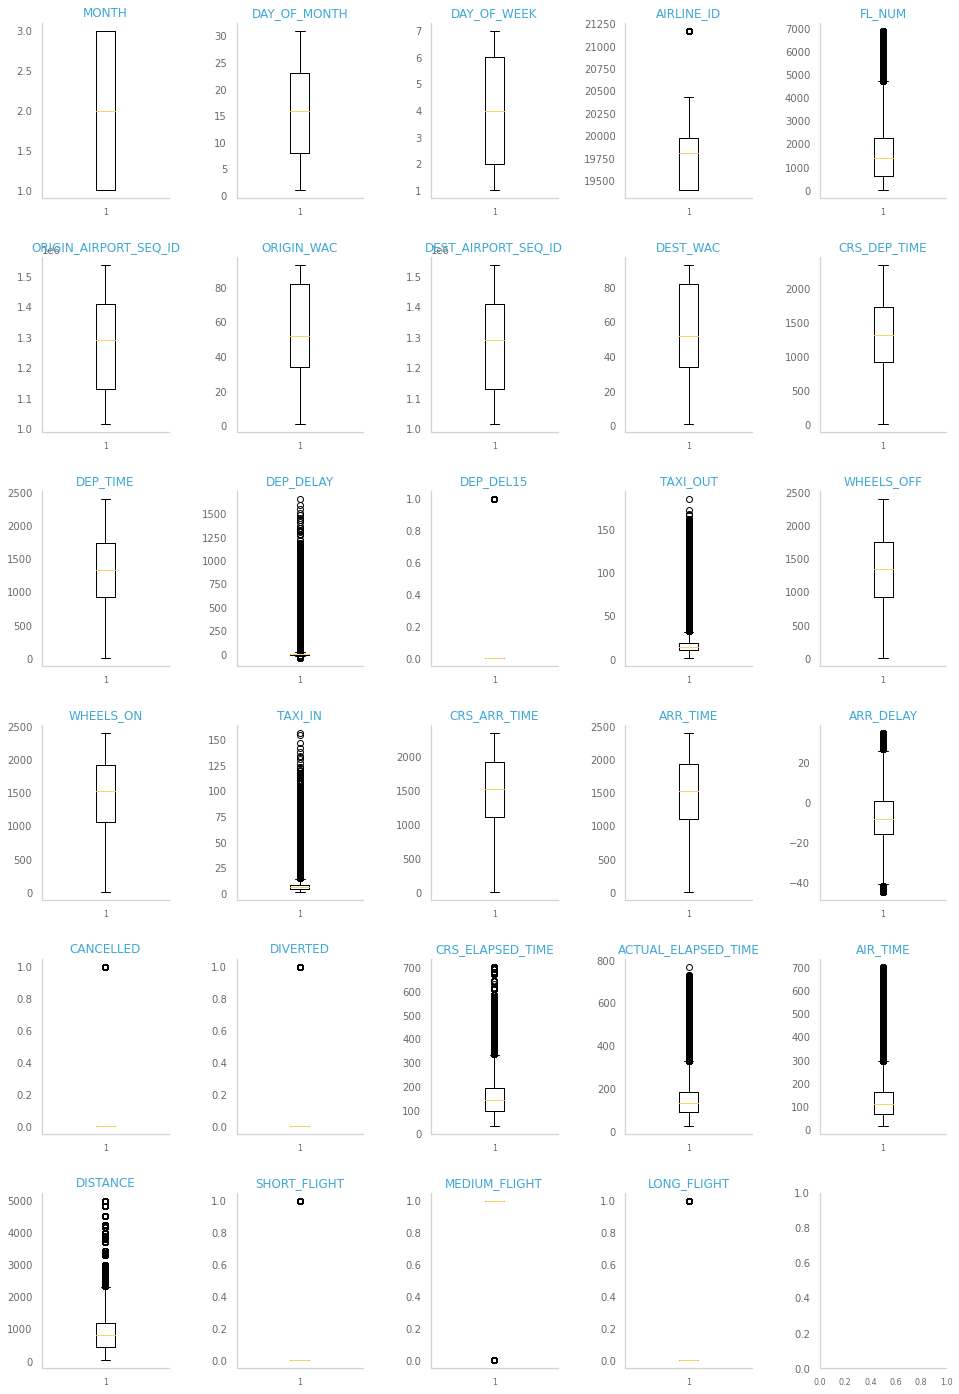

In [23]:
dfQuantitative=df.select_dtypes(include=["datetime","number","bool","float64"])
plotBoxes(plt,dfQuantitative,6,5)

## Correlations

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


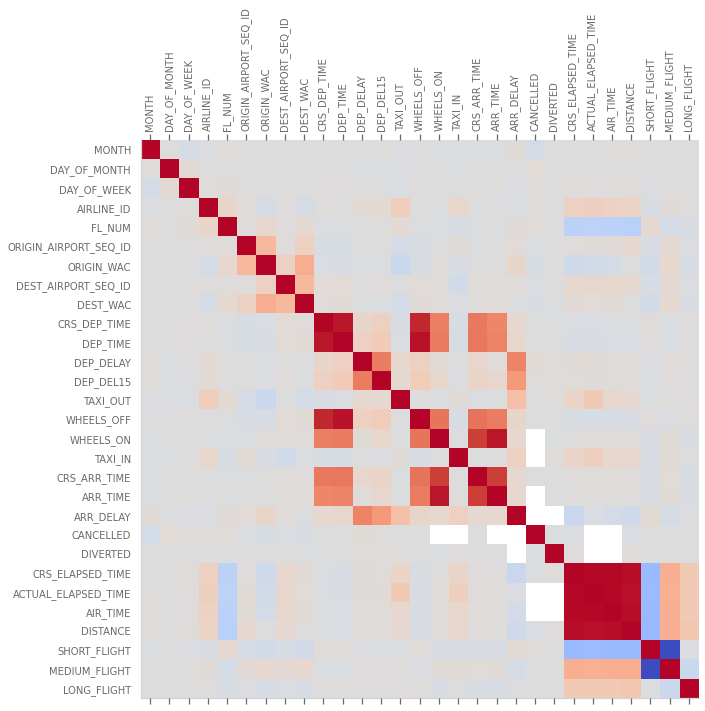

In [24]:
plotCorrelationHeatmap(plt,dfQuantitative)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097760 entries, 0 to 1097759
Data columns (total 36 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   MONTH                  1097760 non-null  int64  
 1   DAY_OF_MONTH           1097760 non-null  int64  
 2   DAY_OF_WEEK            1097760 non-null  int64  
 3   FL_DATE                1097760 non-null  object 
 4   UNIQUE_CARRIER         1097760 non-null  object 
 5   AIRLINE_ID             1097760 non-null  float64
 6   CARRIER                1097760 non-null  object 
 7   TAIL_NUM               1091828 non-null  object 
 8   FL_NUM                 1097760 non-null  float64
 9   ORIGIN_AIRPORT_SEQ_ID  1097760 non-null  float64
 10  ORIGIN_CITY_NAME       1097760 non-null  object 
 11  ORIGIN_WAC             1097760 non-null  float64
 12  DEST_AIRPORT_SEQ_ID    1097760 non-null  float64
 13  DEST_CITY_NAME         1097760 non-null  object 
 14  DEST_WAC          

In [26]:
# Variables correlées à la cible
df.corr()['ARR_DELAY'].sort_values(ascending=False)

ARR_DELAY                1.000000
DEP_DELAY                0.599785
DEP_DEL15                0.497467
TAXI_OUT                 0.284233
TAXI_IN                  0.150567
ORIGIN_WAC               0.103614
WHEELS_OFF               0.101513
DEP_TIME                 0.096101
WHEELS_ON                0.082082
CRS_DEP_TIME             0.080292
ARR_TIME                 0.077557
CRS_ARR_TIME             0.069148
SHORT_FLIGHT             0.057339
ORIGIN_AIRPORT_SEQ_ID    0.040965
MONTH                    0.029049
FL_NUM                   0.028692
DEST_AIRPORT_SEQ_ID      0.024937
LONG_FLIGHT             -0.006491
DAY_OF_MONTH            -0.009494
DEST_WAC                -0.010517
DAY_OF_WEEK             -0.013183
AIRLINE_ID              -0.018941
ACTUAL_ELAPSED_TIME     -0.025063
MEDIUM_FLIGHT           -0.056097
AIR_TIME                -0.063702
DISTANCE                -0.092409
CRS_ELAPSED_TIME        -0.129100
CANCELLED                     NaN
DIVERTED                      NaN
Name: ARR_DELA

In [27]:
# Filtres variables correlées à la cible à plus de 12%
df.corr()['ARR_DELAY'].abs() > .12

MONTH                    False
DAY_OF_MONTH             False
DAY_OF_WEEK              False
AIRLINE_ID               False
FL_NUM                   False
ORIGIN_AIRPORT_SEQ_ID    False
ORIGIN_WAC               False
DEST_AIRPORT_SEQ_ID      False
DEST_WAC                 False
CRS_DEP_TIME             False
DEP_TIME                 False
DEP_DELAY                 True
DEP_DEL15                 True
TAXI_OUT                  True
WHEELS_OFF               False
WHEELS_ON                False
TAXI_IN                   True
CRS_ARR_TIME             False
ARR_TIME                 False
ARR_DELAY                 True
CANCELLED                False
DIVERTED                 False
CRS_ELAPSED_TIME          True
ACTUAL_ELAPSED_TIME      False
AIR_TIME                 False
DISTANCE                 False
SHORT_FLIGHT             False
MEDIUM_FLIGHT            False
LONG_FLIGHT              False
Name: ARR_DELAY, dtype: bool

# ACP

In [28]:
from sklearn import preprocessing

# filtrage
dataPCA=df.select_dtypes(include=["datetime","number","bool","float64"]).dropna()

nomsIndividus=df.index # Individus

variables=dataPCA.columns # Variables
X=dataPCA.values # Valeurs

centreReduit = preprocessing.StandardScaler().fit(X)
XCentreReduit = centreReduit.transform(X)
XCentreReduit.shape

(983527, 29)

In [29]:
from sklearn import decomposition

nComposantes=26 # n_comp <= nombre de variables
pca = decomposition.PCA(n_components=nComposantes)
pca.fit(XCentreReduit)

PCA(n_components=26)

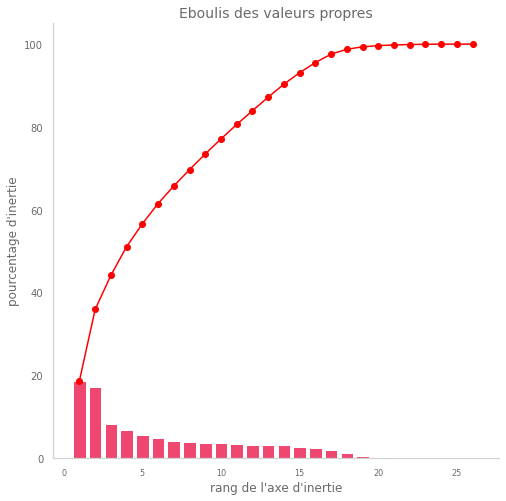

In [30]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (8,8)

vectVarianceExpliquee = pca.explained_variance_ratio_*100 # renvoie les variences expliquées pour chacune des dimensions
plt.bar(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee)
plt.plot(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=14,fontweight='normal')
plt.show()

<ipython-input-31-77d83b8aeca1>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.arrow(0,0,composantesPrincipales[d1][i],composantesPrincipales[d2][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")


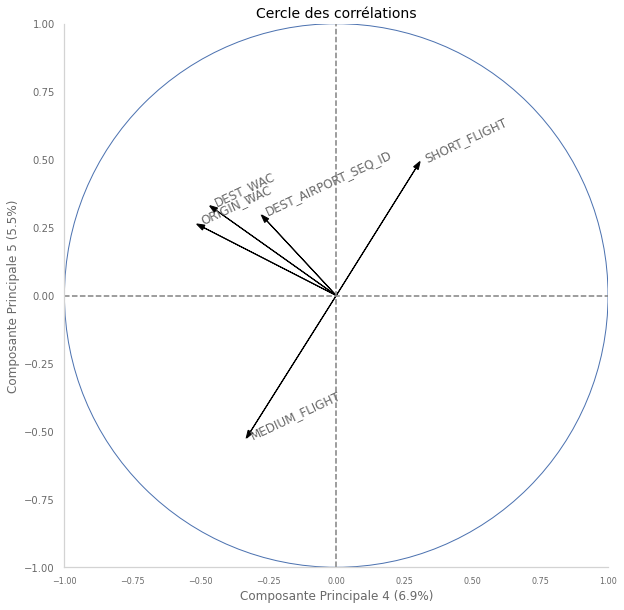

In [31]:
import numpy as np

composantesPrincipales = pca.components_ # triés par variance expliquée

# Selection du plan Factoriel
#dimension 1
d1=3
#dimension 2
d2=4

# taille du schema
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

# configuration de la bordure
plt.xlim(-1,1)
plt.ylim(-1,1)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# libelles des axes
plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Cercle des corrélations',color="black",fontsize=14,fontweight='normal')
# afficher le cercle
cercle = plt.Circle((0,0),radius=1, color='b', fill=False)
ax.set_aspect(1)
ax.add_patch(cercle)


#placement des étiquettes des p variables + fleches (partant du centre vers les points projetés)
for i in range(len(variables)):
    p=np.array([composantesPrincipales[d1][i],composantesPrincipales[d2][i]])


    # on utilise la distance euclidienne pour n'afficher les labels que pour les individus loin du centre
    distance= np.linalg.norm(p-np.array([0,0]))

    if distance>0.405:
        plt.annotate(variables[i],xy =(composantesPrincipales[d1][i],composantesPrincipales[d2][i]),xytext =(composantesPrincipales[d1][i]+0.01,composantesPrincipales[d2][i]),arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),rotation=25) 
        plt.arrow(0,0,composantesPrincipales[d1][i],composantesPrincipales[d2][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")
    
#import os
#os.system('say "jai fini de travailler"')    

A partir de l'acp et de l'analyse projections sur les composantes principales 1, 2, 3, 4, on peut identifier les familles de variables suivantes:  
* Temps ecoulé (elapsed time)
* Heure de départ (dep time)
* Retard au depart (delay)
* Origine (origin)
* Destination (dest)
* Airline/Vol (airline/fl)

In [32]:
elapsed=time.time()-start
print(f"- elapsed: {elapsed} secs")

- elapsed: 83.27138209342957 secs
